In [39]:
# Setup
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import mxnet.gluon as gluon
from mxnet.gluon import nn

npx.set_np()

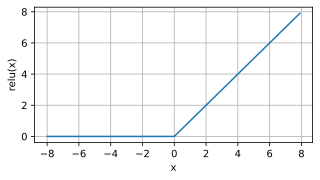

In [14]:
# ReLU
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
d2l.plot(x, y, "x", "relu(x)", figsize=(5, 2.5))

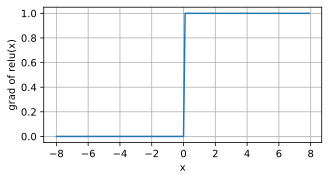

In [15]:
# ReLU gradient
y.backward()
d2l.plot(x, x.grad, "x", "grad of relu(x)", figsize=(5, 2.5))

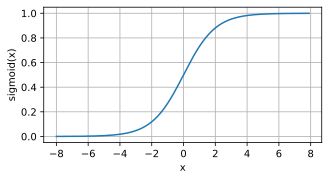

In [16]:
# Sigmoid
with autograd.record():
    y = npx.sigmoid(x)
d2l.plot(x, y, "x", "sigmoid(x)", figsize=(5, 2.5))

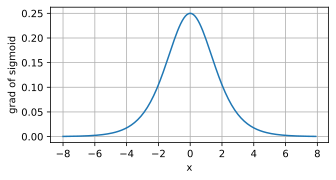

In [17]:
# Gradient of sigmoid
y.backward()
d2l.plot(x, x.grad, "x", "grad of sigmoid", figsize=(5, 2.5))

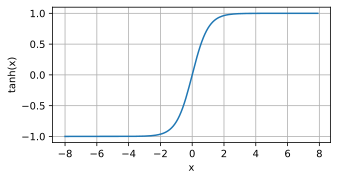

In [18]:
# Tanh
with autograd.record():
    y = np.tanh(x)
d2l.plot(x, y, "x", "tanh(x)", figsize=(5, 2.5))

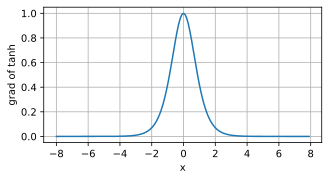

In [19]:
# Grad of tanh - notice the gradient is sharper than sigmoid
y.backward()
d2l.plot(x, x.grad, "x", "grad of tanh", figsize=(5, 2.5))

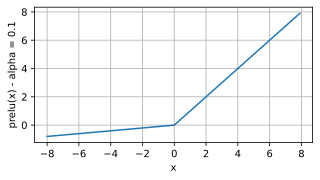

In [20]:
# pReLU - alpha = 0.1
def prelu(x, alpha):
    y1 = alpha * x[x < 0] # alpha * min(0, x)
    y2 = x[x >= 0] # max(0, x)
    return np.concatenate((y1, y2))

with autograd.record():
    y = nn.PReLU?
    y = prelu(x, 0.1)

d2l.plot(x, y, "x", "prelu(x) - alpha = 0.1", figsize=(5, 2.5))

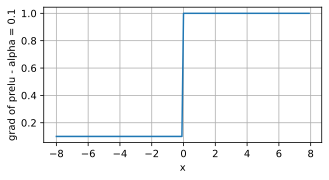

In [21]:
# Grad of prelu - alpha = 0.1
y.backward()
d2l.plot(x, x.grad, "x", "grad of prelu - alpha = 0.1", figsize=(5,2.5))

# Implementation of MLP from Scratch

In [22]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [24]:
# Visualize data
train_iter

In [27]:
# Initialize model parameters
num_inputs, num_outputs, num_hidden = 784, 10, 256

In [28]:
W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hidden))
b1 = np.zeros(num_hidden)
W2 = np.random.normal(scale=0.01, size=(num_hidden, num_outputs))
b2 = np.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

In [73]:
W1.shape, b1.shape, W2.shape, b2.shape

((784, 256), (256,), (256, 10), (10,))

In [74]:
def relu(X):
    return np.maximum(X, 0)

In [75]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    return np.dot(H, W2) + b2

In [76]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

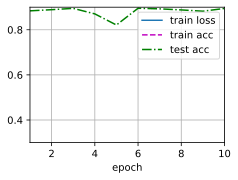

In [79]:
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, lambda batch_size: d2l.sgd(params, lr, batch_size))

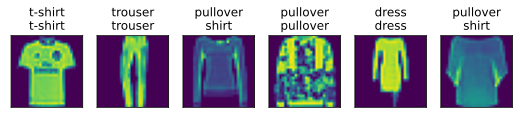

In [78]:
d2l.predict_ch3(net, test_iter)